In [40]:
!pip install kaggle


In [ ]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"charitygithogora","key":"5a802adf4692c1e06e09fe53799760b1"}'}

In [ ]:
import os
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
!kaggle datasets download -d aravinii/duolingo-spaced-repetition-data

Dataset URL: https://www.kaggle.com/datasets/aravinii/duolingo-spaced-repetition-data
License(s): Attribution-NonCommercial 4.0 International (CC BY-NC 4.0)
 96% 346M/362M [00:02<00:00, 128MB/s]
100% 362M/362M [00:02<00:00, 139MB/s]


In [ ]:
!unzip duolingo-spaced-repetition-data.zip

Archive:  duolingo-spaced-repetition-data.zip
  inflating: learning_traces.13m.csv  


In [ ]:
import os
print("Dataset Size:", os.path.getsize("duolingo-spaced-repetition-data.zip") / (1024 * 1024), "MB")

Dataset Size: 361.8864812850952 MB


In [ ]:
import pandas as pd
df = pd.read_csv("learning_traces.13m.csv")
df.head()

,p_recall,timestamp,delta,user_id,learning_language,ui_language,lexeme_id,lexeme_string,history_seen,history_correct,session_seen,session_correct
0,1.0,1362076081,27649635,u:FO,de,en,76390c1350a8dac31186187e2fe1e178,lernt/lernen<vblex><pri><p3><sg>,6,4,2,2
1,0.5,1362076081,27649635,u:FO,de,en,7dfd7086f3671685e2cf1c1da72796d7,die/die<det><def><f><sg><nom>,4,4,2,1
2,1.0,1362076081,27649635,u:FO,de,en,35a54c25a2cda8127343f6a82e6f6b7d,mann/mann<n><m><sg><nom>,5,4,1,1
3,0.5,1362076081,27649635,u:FO,de,en,0cf63ffe3dda158bc3dbd55682b355ae,frau/frau<n><f><sg><nom>,6,5,2,1
4,1.0,1362076081,27649635,u:FO,de,en,84920990d78044db53c1b012f5bf9ab5,das/das<det><def><nt><sg><nom>,4,4,1,1


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12854226 entries, 0 to 12854225
Data columns (total 12 columns):
 #   Column             Dtype  
---  ------             -----  
 0   p_recall           float64
 1   timestamp          int64  
 2   delta              int64  
 3   user_id            object 
 4   learning_language  object 
 5   ui_language        object 
 6   lexeme_id          object 
 7   lexeme_string      object 
 8   history_seen       int64  
 9   history_correct    int64  
 10  session_seen       int64  
 11  session_correct    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 1.1+ GB


In [ ]:
df.isnull().sum()

,0
p_recall,0
timestamp,0
delta,0
user_id,0
learning_language,0
ui_language,0
lexeme_id,0
lexeme_string,0
history_seen,0
history_correct,0


In [ ]:
df.duplicated().sum()

81

In [ ]:
df = df.drop_duplicates()

In [ ]:
df.duplicated().sum()

0

In [ ]:
df.describe()

,p_recall,timestamp,delta,history_seen,history_correct,session_seen,session_correct
count,1.285414e+07,1.285414e+07,1.285414e+07,1.285414e+07,1.285414e+07,1.285414e+07,1.285414e+07
mean,8.961069e-01,1.362589e+09,7.295811e+05,2.198107e+01,1.935027e+01,1.817689e+00,1.644139e+00
std,2.714029e-01,2.932088e+05,2.246504e+06,1.295512e+02,1.119684e+02,1.360182e+00,1.318795e+00
min,0.000000e+00,1.362076e+09,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00
25%,1.000000e+00,1.362343e+09,5.320000e+02,3.000000e+00,3.000000e+00,1.000000e+00,1.000000e+00
50%,1.000000e+00,1.362591e+09,7.713400e+04,6.000000e+00,6.000000e+00,1.000000e+00,1.000000e+00
75%,1.000000e+00,1.362846e+09,4.425030e+05,1.500000e+01,1.300000e+01,2.000000e+00,2.000000e+00
max,1.000000e+00,1.363105e+09,4.032836e+07,1.351800e+04,1.288800e+04,2.000000e+01,2.000000e+01


In [ ]:
print(df['learning_language'].unique())
print(df['ui_language'].unique())
print(df['lexeme_string'].unique())

['de' 'es' 'pt' 'en' 'fr' 'it']
['en' 'pt' 'es' 'it']
['lernt/lernen<vblex><pri><p3><sg>' 'die/die<det><def><f><sg><nom>'
 'mann/mann<n><m><sg><nom>' ... 'foi/ir<vblex><ifi><p3><sg>'
 '<*sf>/heißen<vblex><pri><*pers><*numb>' 'compagnie/compagnie<n><f><sg>']


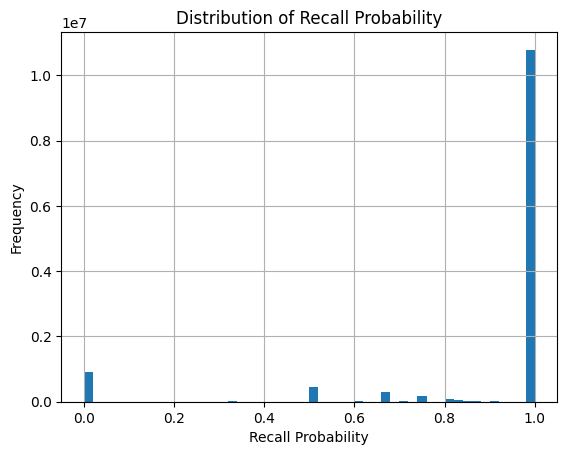

In [ ]:
import matplotlib.pyplot as plt
df['p_recall'].hist(bins=50)
plt.title('Distribution of Recall Probability')
plt.xlabel('Recall Probability')
plt.ylabel('Frequency')
plt.show()

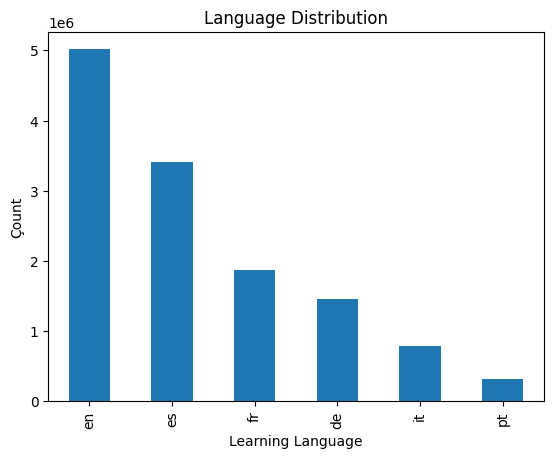

In [ ]:
df['learning_language'].value_counts().plot(kind='bar')
plt.title('Language Distribution')
plt.xlabel('Learning Language')
plt.ylabel('Çount')
plt.show()

In [ ]:
df.isnull().sum()

,0
p_recall,0
timestamp,0
delta,0
user_id,0
learning_language,0
ui_language,0
lexeme_id,0
lexeme_string,0
history_seen,0
history_correct,0


In [ ]:
df.describe()

,p_recall,timestamp,delta,history_seen,history_correct,session_seen,session_correct
count,1.285414e+07,1.285414e+07,1.285414e+07,1.285414e+07,1.285414e+07,1.285414e+07,1.285414e+07
mean,8.961069e-01,1.362589e+09,7.295811e+05,2.198107e+01,1.935027e+01,1.817689e+00,1.644139e+00
std,2.714029e-01,2.932088e+05,2.246504e+06,1.295512e+02,1.119684e+02,1.360182e+00,1.318795e+00
min,0.000000e+00,1.362076e+09,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00
25%,1.000000e+00,1.362343e+09,5.320000e+02,3.000000e+00,3.000000e+00,1.000000e+00,1.000000e+00
50%,1.000000e+00,1.362591e+09,7.713400e+04,6.000000e+00,6.000000e+00,1.000000e+00,1.000000e+00
75%,1.000000e+00,1.362846e+09,4.425030e+05,1.500000e+01,1.300000e+01,2.000000e+00,2.000000e+00
max,1.000000e+00,1.363105e+09,4.032836e+07,1.351800e+04,1.288800e+04,2.000000e+01,2.000000e+01


In [ ]:
df = df.sort_values(by='timestamp')

In [ ]:
#Saving the cleaned dataset
df.to_csv("cleaned_duolingo.csv", index=False)

In [ ]:
!ls -lh

total 2.8G
-rw-r--r-- 1 root root 1.3G Feb 22 07:34 cleaned_duolingo.csv
-rw-r--r-- 1 root root 362M Feb 11  2024 duolingo-spaced-repetition-data.zip
-rw-r--r-- 1 root root   72 Feb 22 07:27 kaggle.json
-rw-r--r-- 1 root root 1.3G Feb 11  2024 learning_traces.13m.csv
drwxr-xr-x 1 root root 4.0K Feb 20 14:24 sample_data


In [45]:
# Loading the cleaned dataset
df = pd.read_csv("cleaned_duolingo.csv")

# Converting timestamp to datetime
df['timestamp'] = pd.to_datetime(df["timestamp"], unit="s")

# Extracting the hour and day of the week
df["hour"] = df["timestamp"].dt.hour
df["day_of_week"] = df["timestamp"].dt.day_name()

PLOTTING THE HEATMAP

In [ ]:
!pip install plotly


In [41]:
import plotly.express as px

# Creatign the heatmap
fig = px.imshow(
    heatmap_data,
    labels=dict(x="Hour of the Day", y="Day of the week", color="Correct Answers"),
    x=heatmap_data.columns,
    y=heatmap_data.index,
    color_continuous_scale="RdBu"
)

# Setting the title
fig.update_layout(
    title="Duolingo Learning Patterns: Heatmap of Correct Answers",
    title_x=0.5
    )


# Show the interactive plot
fig.show()

In [44]:
from google.colab import files
files.download("cleaned_duolingo.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>